In [7]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
srusti=pd.read_csv('Social_Network_Ads.csv')
srusti.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
srusti=srusti.drop('User ID',axis=1)
srusti.loc[(srusti.Gender == 'Male'),'Gender']=1
srusti.loc[(srusti.Gender == 'Female'),'Gender']=0

srusti.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
target_column=['EstimatedSalary']
predictors=list(set(list(srusti.columns))-set(target_column))
srusti[predictors]=srusti[predictors]/srusti[predictors].max()
srusti.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,0.627583,69742.500000,0.357500
std,0.500526,0.174715,34096.960282,0.479864
min,0.000000,0.300000,15000.000000,0.000000
25%,0.000000,0.495833,43000.000000,0.000000
50%,0.000000,0.616667,70000.000000,0.000000
75%,1.000000,0.766667,88000.000000,1.000000
max,1.000000,1.000000,150000.000000,1.000000


In [11]:
predictors

['Gender', 'Age', 'Purchased']

In [12]:
x=srusti[predictors].values
y=srusti[target_column].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=40)
print(x_train.shape);
print(x_test.shape)

(280L, 3L)
(120L, 3L)


In [13]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
pred_train_lr=lr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train,pred_train_lr))

pred_test_lr=lr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test,pred_test_lr))

31092.627537403976
0.18475826693440012
32972.13912364256
-0.0035197059221265814


# lasso

In [15]:
srusti=pd.read_csv('Social_Network_Ads.csv')
srusti.head()

srusti=srusti.drop('User ID',axis=1)
srusti.loc[(srusti.Gender == 'Male'),'Gender']=1
srusti.loc[(srusti.Gender == 'Female'),'Gender']=0

srusti.head()

target_column=['EstimatedSalary']
predictors=list(set(list(srusti.columns))-set(target_column))
srusti[predictors]=srusti[predictors]/srusti[predictors].max()
srusti.describe()

predictors

x=srusti[predictors].values
y=srusti[target_column].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=40)
print(x_train.shape);
print(x_test.shape)

(280L, 3L)
(120L, 3L)


In [16]:
rr=Lasso(alpha=0.01)
rr.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
pred_train_rr=rr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train,pred_train_rr))

pred_test_rr=rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test,pred_test_rr))

31092.627537554054
0.1847582669265302
32972.134859908365
-0.003519446385370717


# ridge

In [18]:
srusti=pd.read_csv('Social_Network_Ads.csv')
srusti.head()

srusti=srusti.drop('User ID',axis=1)
srusti.loc[(srusti.Gender == 'Male'),'Gender']=1
srusti.loc[(srusti.Gender == 'Female'),'Gender']=0

srusti.head()

target_column=['EstimatedSalary']
predictors=list(set(list(srusti.columns))-set(target_column))
srusti[predictors]=srusti[predictors]/srusti[predictors].max()
srusti.describe()

predictors

x=srusti[predictors].values
y=srusti[target_column].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=40)
print(x_train.shape);
print(x_test.shape)

(280L, 3L)
(120L, 3L)


In [19]:
rr=Ridge(alpha=0.01)
rr.fit(x_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
pred_train_rr=rr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train,pred_train_rr))

pred_test_rr=rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test,pred_test_rr))

31092.628586526364
0.18475821191889097
32971.82767658847
-0.0035007479904709538


# logistic

In [21]:
srusti=pd.read_csv('Social_Network_Ads.csv')
srusti.head()

srusti=srusti.drop('User ID',axis=1)
srusti.loc[(srusti.Gender == 'Male'),'Gender']=1
srusti.loc[(srusti.Gender == 'Female'),'Gender']=0

srusti.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [22]:
target_column=['Purchased']
predictors=list(set(list(srusti.columns))-set(target_column))
srusti[predictors]=srusti[predictors]/srusti[predictors].max()

In [23]:
predictors

['Gender', 'Age', 'EstimatedSalary']

In [63]:
x=srusti[predictors].values
y=srusti[target_column].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=40)
print(x_train.shape);
print(x_test.shape)

(280L, 3L)
(120L, 3L)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
pred_train_log=log.predict(x_train)
print(classification_report(y_train,pred_train_log))
print(confusion_matrix(y_train,pred_train_log))

pred_test_log=log.predict(x_test)
print(classification_report(y_test,pred_test_log))
print(confusion_matrix(y_test,pred_test_log))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       201
           1       0.87      0.60      0.71       119

   micro avg       0.82      0.82      0.82       320
   macro avg       0.83      0.77      0.79       320
weighted avg       0.82      0.82      0.81       320

[[190  11]
 [ 48  71]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        56
           1       0.85      0.46      0.59        24

   micro avg       0.81      0.81      0.81        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.82      0.81      0.79        80

[[54  2]
 [13 11]]


In [58]:
print(accuracy_score(y_test,pred_test_log))

0.8125


# PCA

In [94]:
srusti=pd.read_csv('Social_Network_Ads.csv')
srusti.head()

srusti=srusti.drop('User ID',axis=1)
srusti.loc[(srusti.Gender == 'Male'),'Gender']=1
srusti.loc[(srusti.Gender == 'Female'),'Gender']=0

x = srusti.drop("Purchased",1)
y = srusti["Purchased"]

In [95]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=40)
print(x_train.shape);
print(x_test.shape)

(280, 3)
(120, 3)


In [97]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
pca.n_components_

3L

In [99]:
from pandas import DataFrame
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,4)], columns=["Explained Variance"]).T

,P1,P2,P3
Explained Variance,1.162603e+09,107.24,0.25


In [100]:
DataFrame(pca.explained_variance_ratio_.round(2), index = ["P" + str(i) for i in range(1,4)], columns=["Explained Variance Ratio"]).T

,P1,P2,P3
Explained Variance Ratio,1.0,0.0,0.0


In [101]:
components_applied = DataFrame(pca.transform(x))
components_applied.columns = ["P" + str(i) for i in range(1,4)]
components_applied.round(2).head()

,P1,P2,P3
0,-50742.5,-16.23,0.41
1,-49742.5,-0.28,0.46
2,-26742.5,-10.38,-0.55
3,-12742.5,-10.05,-0.53
4,6257.5,-18.96,0.46


In [102]:
components_applied.dtypes

P1    float64
P2    float64
P3    float64
dtype: object

In [103]:
from pandas import concat
from IPython.display import display

for p in components_applied.columns:
    
    #new_df = x.copy()
    components_applied[p]
    display(DataFrame( components_applied.corr().round(2)[p]).drop(p,0).T)

,P2,P3
P1,0.0,0.0


,P1,P3
P2,0.0,0.0


,P1,P2
P3,0.0,0.0


In [104]:
from seaborn import kdeplot, distplot, set_style, despine
from matplotlib.pyplot import figure, show, title, subplots
from pandas import Series

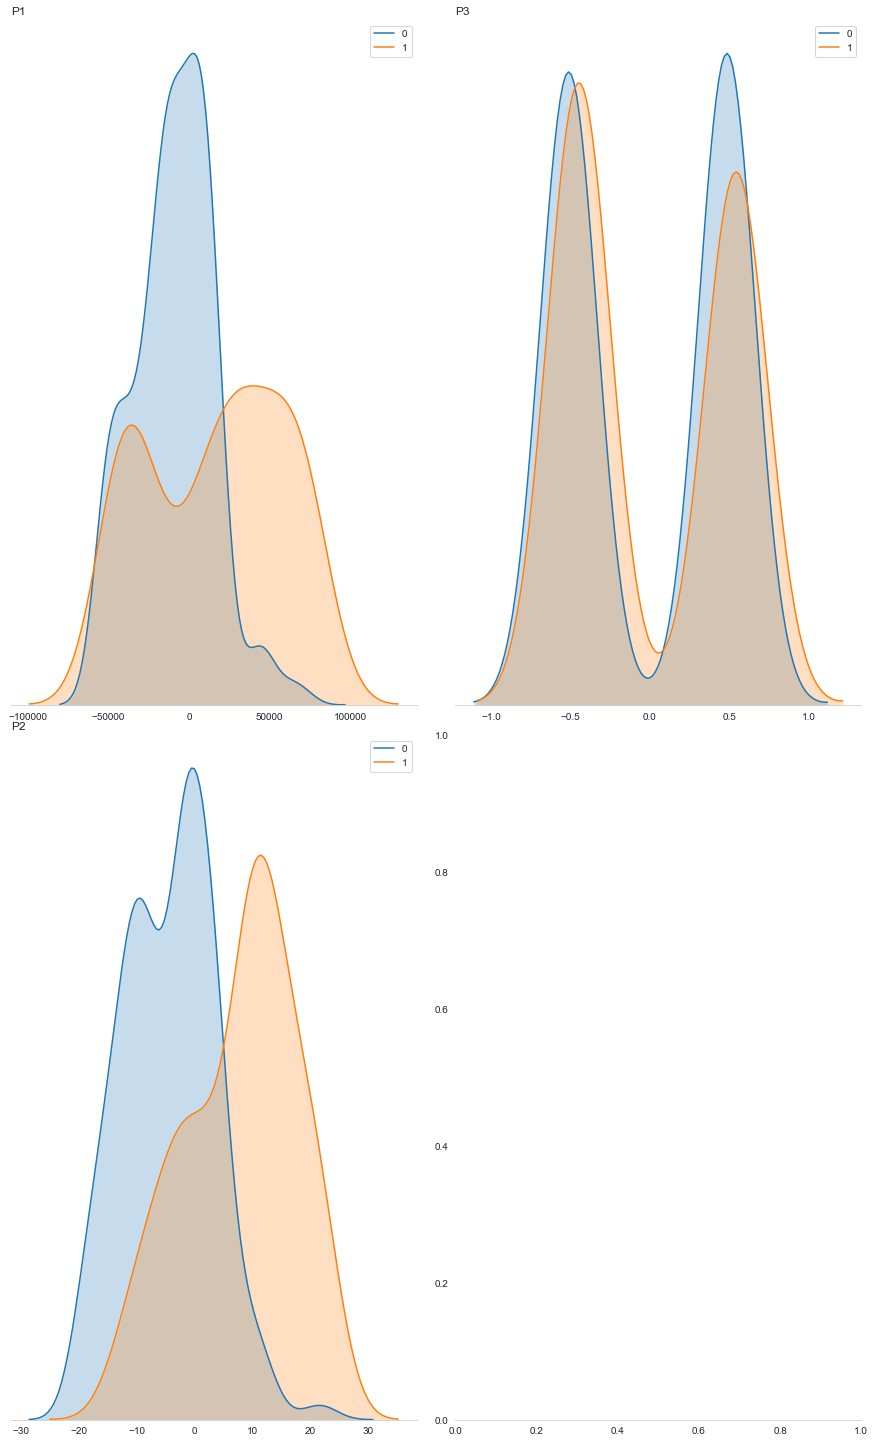

In [106]:
set_style("whitegrid")
set_style({"axes.grid":False})

for_plotting = components_applied.copy()
for_plotting["Purchased"] = y

n = 4
fig, axes = subplots(int(4/2),2, figsize=(12.5,20))
fig.tight_layout()
i = 0
j = 0


for p in components_applied.columns:
    
    for t in for_plotting["Purchased"].unique():
        data_by_type = for_plotting[for_plotting["Purchased"] == t]
        kdeplot(Series(data_by_type[p], name = t), shade=True, ax=axes[i][j])
        #distplot(Series(data_by_type[p], name = t), kde=False, ax=axes[i][j])
        axes[i][j].set_title(p, loc="left")
        axes[i][j].set_xlabel("",visible=False)
        axes[i][j].set_yticklabels([],visible=False)
        despine(left=True)
    i += 1
    
    if(i == n/2):
        i = 0
        j += 1
    
show()

# LDA

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [62]:
lda=LDA(n_components=1)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

In [68]:
pred_train_log=log.predict(x_train)
print(classification_report(y_train,pred_train_log))
print(confusion_matrix(y_train,pred_train_log))

pred_test_log=log.predict(x_test)
print(classification_report(y_test,pred_test_log))
print(confusion_matrix(y_test,pred_test_log))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       180
           1       0.00      0.00      0.00       100

   micro avg       0.64      0.64      0.64       280
   macro avg       0.32      0.50      0.39       280
weighted avg       0.41      0.64      0.50       280

[[180   0]
 [100   0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        77
           1       0.00      0.00      0.00        43

   micro avg       0.64      0.64      0.64       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.41      0.64      0.50       120

[[77  0]
 [43  0]]


C:\Users\Raj\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
print(accuracy_score(y_test,pred_test_log))

0.6416666666666667
